Trabajar con un DataSet artificial para crear un sistema de recomendación para una **agencia de viajes**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel(r'C:\Users\Ульяна\Desktop\jupiter\datasets\trips_data.xlsx', index_col=0)
df.head(10)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney
5,209000,Новосибирск,55,Архитектура,Самолет,2,Tokio
6,59000,Минск,53,Пляжный отдых,Автомобиль,1,London
7,73000,Хабаровск,55,Шоппинг,Поезд,2,New York
8,216000,Томск,75,Шоппинг,Самолет,1,Sydney
9,56000,Киев,60,Шоппинг,Автомобиль,2,New York


<Axes: >

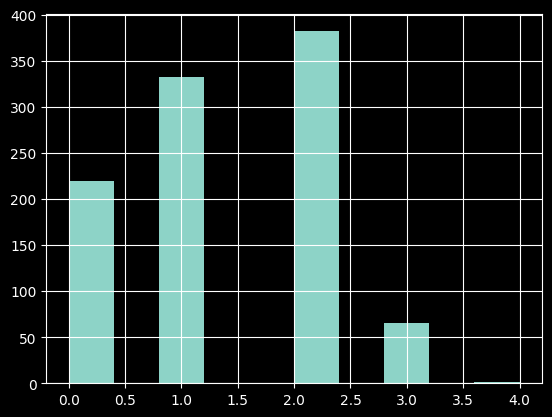

In [2]:
df['family_members'].hist()

In [3]:
df[df['transport_preference'] == 'Космический корабль']

,salary,city,age,vacation_preference,transport_preference,family_members,target
568,161000,Новосибирск,63,Пляжный отдых,Космический корабль,2,Tokio


In [4]:
df[df['vacation_preference'] == 'Ночные клубы']

,salary,city,age,vacation_preference,transport_preference,family_members,target
566,150000,Омск,40,Ночные клубы,Поезд,0,New York


In [5]:
df['target'].value_counts()

target
Paris       203
New York    201
London      199
Tokio       199
Sydney      198
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   salary                1000 non-null   int64 
 1   city                  1000 non-null   object
 2   age                   1000 non-null   int64 
 3   vacation_preference   1000 non-null   object
 4   transport_preference  1000 non-null   object
 5   family_members        1000 non-null   int64 
 6   target                1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 62.5+ KB


<Axes: >

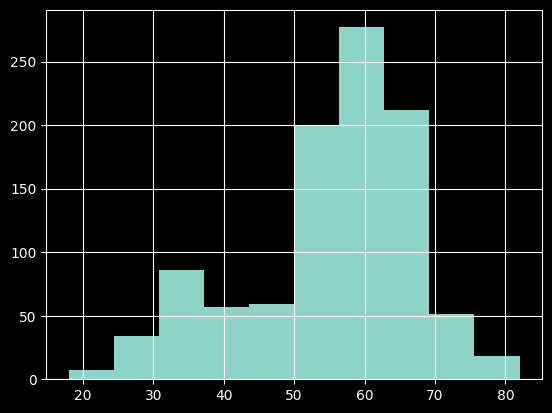

In [7]:
df['age'].hist() 

<Axes: >

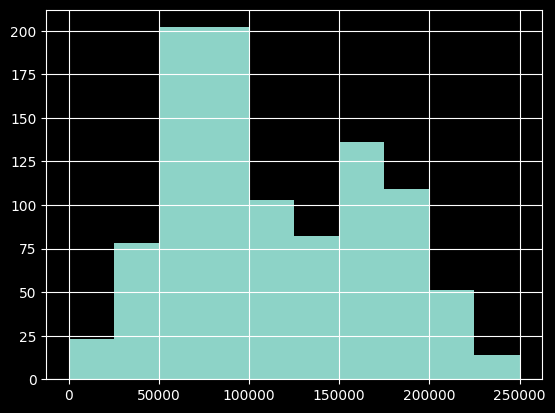

In [8]:
df['salary'].hist() 

In [9]:
df['city'].value_counts()

city
Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: count, dtype: int64

In [10]:
df['city'].nunique()



11

In [11]:
df['city'].unique()

array(['Краснодар', 'Екатеринбург', 'Томск', 'Новосибирск', 'Минск',
       'Хабаровск', 'Киев', 'Омск', 'Ярославль', 'Петербург', 'Москва'],
      dtype=object)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [13]:
df.iloc[[513]] # случайно выбираю подвыроку из датафрейм

,salary,city,age,vacation_preference,transport_preference,family_members,target
513,204000,Петербург,73,Пляжный отдых,Самолет,0,London


In [14]:
# создаем копию данных
data = df.copy()

# Предобработка данных для того чтобы переопределить текстовые данные в числа
label_encoder_city = LabelEncoder()
label_encoder_preference = LabelEncoder()
label_encoder_transport = LabelEncoder()

In [15]:
data['city'] = label_encoder_city.fit_transform(data['city'])
data['vacation_preference'] = label_encoder_preference.fit_transform(data['vacation_preference'])
data['transport_preference'] = label_encoder_transport.fit_transform(data['transport_preference'])

In [16]:
df.head(5)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [17]:
data.head(5)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,2,25,3,0,1,New York
1,152000,0,60,0,4,1,London
2,83000,8,49,0,0,2,Sydney
3,161000,2,41,3,0,0,New York
4,146000,2,58,0,4,1,Sydney


In [18]:
label_encoder_city.classes_

array(['Екатеринбург', 'Киев', 'Краснодар', 'Минск', 'Москва',
       'Новосибирск', 'Омск', 'Петербург', 'Томск', 'Хабаровск',
       'Ярославль'], dtype=object)

In [19]:
# Разделение данных
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

usaremos **RandomForestClassifier**

In [20]:
# Создание и обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

In [22]:
# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.845


In [23]:
# Оценка влияния признаков
feature_importances = model.feature_importances_

# Создание DataFrame для наглядности
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Сортировка по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print("Важность признаков:")
feature_importance_df

Важность признаков:


,Feature,Importance
0,salary,0.249911
2,age,0.225492
5,family_members,0.158668
4,transport_preference,0.145661
3,vacation_preference,0.134616
1,city,0.085652


In [24]:
# Новые данные для предсказания
new_data = pd.DataFrame({
    'salary': [20000],
    'city': ['Петербург'],
    'age': [73],
    'vacation_preference': ['Пляжный отдых'],
    'transport_preference': ['Самолет'],
    'family_members': [0]
})

In [25]:
new_data

,salary,city,age,vacation_preference,transport_preference,family_members
0,20000,Петербург,73,Пляжный отдых,Самолет,0


In [26]:
X_test

,salary,city,age,vacation_preference,transport_preference,family_members
770,162000,2,31,0,0,1
332,78000,2,59,2,3,0
403,196000,0,74,0,4,2
933,128000,1,44,3,0,0
511,91000,8,61,0,0,0
...,...,...,...,...,...,...
610,14000,8,59,2,0,1
493,163000,8,35,3,0,1
835,140000,6,55,0,4,1
384,175000,2,52,3,2,1


In [27]:
# Предобработка новых данных
new_data['city'] = label_encoder_city.transform(new_data['city'])
new_data['vacation_preference'] = label_encoder_preference.transform(new_data['vacation_preference'])
new_data['transport_preference'] = label_encoder_transport.transform(new_data['transport_preference'])

In [28]:
new_data

,salary,city,age,vacation_preference,transport_preference,family_members
0,20000,7,73,2,4,0


In [29]:
predictions = model.predict(new_data)

In [30]:
model.predict_proba(new_data)

array([[0.35, 0.01, 0.38, 0.19, 0.07]])

In [31]:
# Вывод результата
print(f"Модель рекомендует отправиться на отдых: {model.predict(new_data)[0]} с вероятностью {model.predict_proba(new_data)[0].max() * 100:.0f}%")

Модель рекомендует отправиться на отдых: Paris с вероятностью 38%


In [32]:
probabilities = model.predict_proba(new_data)

classes = model.classes_

# Создаем DataFrame
data = {'Class': classes, 'Probability': probabilities[0]}
df = pd.DataFrame(data)

# Выводим DataFrame
df

,Class,Probability
0,London,0.35
1,New York,0.01
2,Paris,0.38
3,Sydney,0.19
4,Tokio,0.07


In [33]:
df.sort_values(by='Probability', ascending=False, inplace=True)

In [34]:
import plotly.graph_objects as go

traces = [go.Bar(x=classes, y=probabilities[0])]

fig = go.Figure(data=traces)
fig.show()